In [1]:
from google.colab import files
uploaded = files.upload()

Saving my_movies.csv to my_movies.csv


**REQUIRED** **LIBRYERS**

In [2]:
import pandas as pd
# pip install mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

Data Preprocessing 

In [3]:
Movie_data = pd.read_csv("my_movies.csv")
Movie_data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
list(Movie_data)

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'Sixth Sense',
 'Gladiator',
 'LOTR1',
 'Harry Potter1',
 'Patriot',
 'LOTR2',
 'Harry Potter2',
 'LOTR',
 'Braveheart',
 'Green Mile']

In [5]:
Movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [6]:
Movie_data1 = Movie_data.drop(['V1','V2','V3','V4','V5'],axis=1)
Movie_data1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [7]:
list(Movie_data1)

['Sixth Sense',
 'Gladiator',
 'LOTR1',
 'Harry Potter1',
 'Patriot',
 'LOTR2',
 'Harry Potter2',
 'LOTR',
 'Braveheart',
 'Green Mile']

In [8]:
Movie_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [9]:
# CHECKING FOR THE NULL VALUES 

Movie_data.isnull().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [10]:
# IMPORTING APRIORI 

from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [11]:
# apriori algorithm

movie_items = apriori(Movie_data1, min_support=0.1, use_colnames=True)
movie_items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [12]:
confi_rules = association_rules(movie_items, metric="confidence", min_threshold=0.5)
confi_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
211,"(LOTR1, LOTR2)","(Green Mile, Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
212,(Green Mile),"(Sixth Sense, LOTR1, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
213,(Harry Potter1),"(Green Mile, Sixth Sense, LOTR2, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
214,(LOTR2),"(Green Mile, LOTR1, Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


In [13]:
rules1 = association_rules(movie_items, metric="lift", min_threshold=0.8)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
241,(Green Mile),"(Sixth Sense, LOTR1, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(Harry Potter1),"(Green Mile, Sixth Sense, LOTR2, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(Sixth Sense),"(Green Mile, LOTR1, LOTR2, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
244,(LOTR2),"(Green Mile, LOTR1, Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [14]:
rules1.sort_values('lift',ascending = False)[0:20]
rules1.sort_values('confidence',ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
79,"(Green Mile, Harry Potter1)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
72,"(Sixth Sense, LOTR2)",(Harry Potter1),0.1,0.2,0.1,1.0,5.000000,0.08,inf
188,"(Sixth Sense, LOTR2, Harry Potter1)",(Green Mile),0.1,0.2,0.1,1.0,5.000000,0.08,inf
98,"(Braveheart, Patriot)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
100,(Braveheart),"(Gladiator, Patriot)",0.1,0.6,0.1,1.0,1.666667,0.04,inf
102,"(LOTR, Gladiator)",(Green Mile),0.1,0.2,0.1,1.0,5.000000,0.08,inf
103,"(LOTR, Green Mile)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
104,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.000000,0.09,inf
105,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
183,"(Green Mile, LOTR2)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf


In [15]:
R1=rules1[rules1.lift>1]
R1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
241,(Green Mile),"(Sixth Sense, LOTR1, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(Harry Potter1),"(Green Mile, Sixth Sense, LOTR2, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(Sixth Sense),"(Green Mile, LOTR1, LOTR2, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
244,(LOTR2),"(Green Mile, LOTR1, Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [16]:
l1=R1.pivot('antecedents','consequents','lift')
l1.head()

consequents,(Gladiator),"(LOTR, Green Mile)","(Braveheart, Patriot)","(Gladiator, Braveheart)","(LOTR1, LOTR2)","(Sixth Sense, Gladiator, Green Mile)",(Harry Potter1),"(LOTR, Green Mile, Gladiator)","(LOTR, Sixth Sense, Gladiator)","(LOTR, Sixth Sense, Green Mile)",...,"(LOTR, Gladiator)","(LOTR, Sixth Sense)","(Green Mile, Gladiator)","(Sixth Sense, LOTR1)","(LOTR1, Harry Potter1)","(Sixth Sense, Harry Potter1)","(Sixth Sense, LOTR2)","(LOTR1, Green Mile)","(Gladiator, Patriot)","(Green Mile, Sixth Sense, LOTR2, Harry Potter1)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(Sixth Sense),1.190476,1.666667,NaN,NaN,NaN,NaN,NaN,1.666667,NaN,NaN,...,1.666667,NaN,1.666667,NaN,1.666667,NaN,NaN,1.666667,1.111111,NaN
"(Green Mile, LOTR2)",NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,10.000000,10.0,NaN,NaN,NaN,NaN
"(LOTR, Green Mile)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Braveheart)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(Green Mile),NaN,NaN,NaN,NaN,2.5,NaN,2.5,NaN,5.0,NaN,...,5.000000,5.0,NaN,5.0,5.000000,5.0,5.0,NaN,NaN,NaN


In [17]:
l1=R1.pivot('antecedents','consequents','support')
l1.head()

consequents,(Gladiator),"(LOTR, Green Mile)","(Braveheart, Patriot)","(Gladiator, Braveheart)","(LOTR1, LOTR2)","(Sixth Sense, Gladiator, Green Mile)",(Harry Potter1),"(LOTR, Green Mile, Gladiator)","(LOTR, Sixth Sense, Gladiator)","(LOTR, Sixth Sense, Green Mile)",...,"(LOTR, Gladiator)","(LOTR, Sixth Sense)","(Green Mile, Gladiator)","(Sixth Sense, LOTR1)","(LOTR1, Harry Potter1)","(Sixth Sense, Harry Potter1)","(Sixth Sense, LOTR2)","(LOTR1, Green Mile)","(Gladiator, Patriot)","(Green Mile, Sixth Sense, LOTR2, Harry Potter1)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(Sixth Sense),0.5,0.1,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,...,0.1,NaN,0.1,NaN,0.1,NaN,NaN,0.1,0.4,NaN
"(Green Mile, LOTR2)",NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,...,NaN,NaN,NaN,0.1,0.1,0.1,NaN,NaN,NaN,NaN
"(LOTR, Green Mile)",0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Braveheart)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(Green Mile),NaN,NaN,NaN,NaN,0.1,NaN,0.1,NaN,0.1,NaN,...,0.1,0.1,NaN,0.1,0.1,0.1,0.1,NaN,NaN,NaN


# <<<<< EXPLORATION DATA ANALYSIS <<<<<

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cb6fc9890>,
      dtype=object)

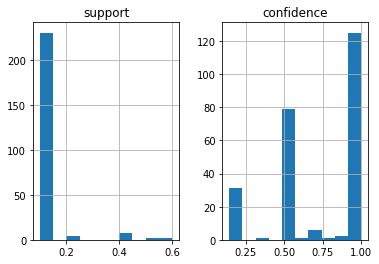

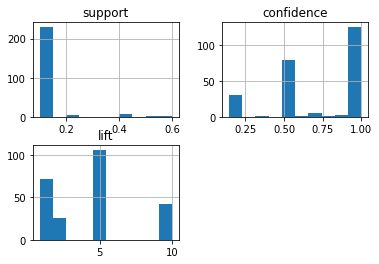

In [21]:
rules1[['support','confidence']].hist()
rules1[['support','confidence','lift']].hist()

# box plot

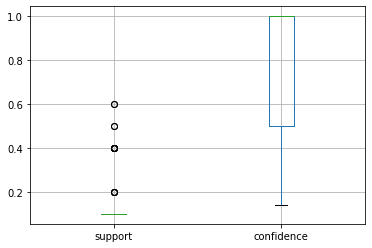

In [25]:
rules1[['support','confidence']].boxplot()

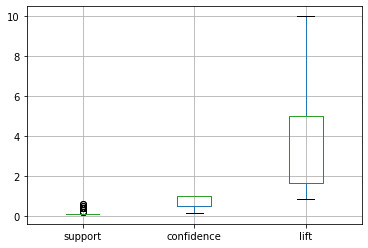

In [26]:
rules1[['support','confidence','lift']].boxplot()

# scatter plot

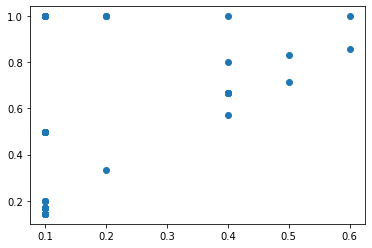

In [27]:
plt.scatter(rules1['support'], rules1['confidence'])
plt.show()

# sns scatter plot 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


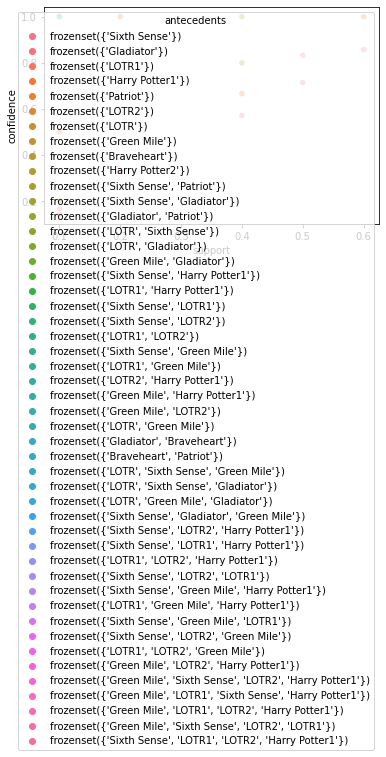

In [28]:
sns.scatterplot('support','confidence', data=rules1, hue='antecedents')
plt.show()

# bar graph 

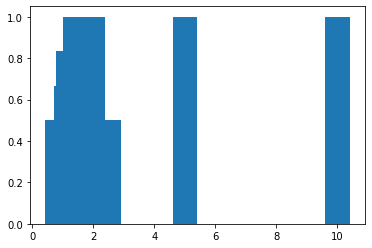

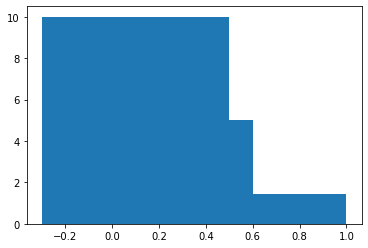

In [29]:
plt.bar(rules1['lift'], rules1['confidence'])
plt.show()

plt.bar(rules1['support'], rules1['lift'])
plt.show()

# TRYING WITH DIFFERENT SUPPORT VALUES,confidence values and lift values

In [30]:
movie_items0 = apriori(Movie_data1, min_support=0.18, use_colnames=True)
movie_items0

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Sixth Sense, Green Mile)"


In [31]:
confi_rules = association_rules(movie_items0, metric="confidence", min_threshold=0.9)
confi_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
2,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.000000,0.16,inf
3,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.000000,0.16,inf
4,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf


In [32]:
rules2 = association_rules(movie_items0, metric="lift", min_threshold=0.95)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [33]:
rules2.sort_values('lift',ascending = False)[0:20]
rules2.sort_values('confidence',ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
10,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
11,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [34]:
R2=rules2[rules2.lift>1]
R2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [35]:
l2=R2.pivot('antecedents','consequents','lift')
l2.head()

consequents,(Gladiator),(Sixth Sense),(Patriot),(Green Mile),(LOTR2),(LOTR1),"(Gladiator, Patriot)","(Sixth Sense, Gladiator)","(Sixth Sense, Patriot)"
antecedents,,,,,,,,,
(Sixth Sense),1.190476,NaN,1.111111,1.666667,NaN,NaN,1.111111,NaN,NaN
(Gladiator),NaN,1.190476,1.428571,NaN,NaN,NaN,NaN,NaN,1.428571
(Patriot),1.428571,1.111111,NaN,NaN,NaN,NaN,NaN,1.333333,NaN
(Green Mile),NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(LOTR1),NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN


In [36]:
l2=R2.pivot('antecedents','consequents','support')
l2.head()

consequents,(Gladiator),(Sixth Sense),(Patriot),(Green Mile),(LOTR2),(LOTR1),"(Gladiator, Patriot)","(Sixth Sense, Gladiator)","(Sixth Sense, Patriot)"
antecedents,,,,,,,,,
(Sixth Sense),0.5,NaN,0.4,0.2,NaN,NaN,0.4,NaN,NaN
(Gladiator),NaN,0.5,0.6,NaN,NaN,NaN,NaN,NaN,0.4
(Patriot),0.6,0.4,NaN,NaN,NaN,NaN,NaN,0.4,NaN
(Green Mile),NaN,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(LOTR1),NaN,NaN,NaN,NaN,0.2,NaN,NaN,NaN,NaN


<<<<< EXPLORATION DATA ANALYSIS <<<<<

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cb4f38c50>,
      dtype=object)

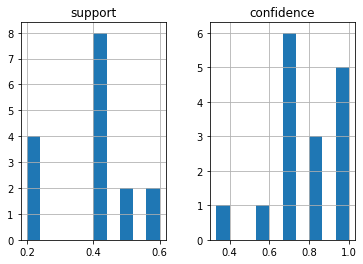

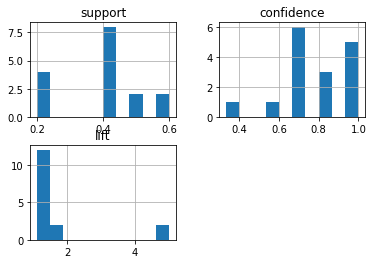

In [38]:
rules2[['support','confidence']].hist()
rules2[['support','confidence','lift']].hist()

scattre plot

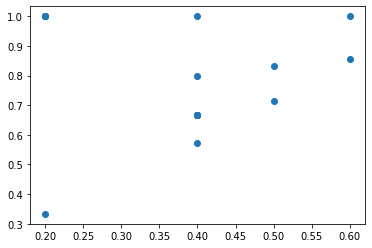

In [39]:
plt.scatter(rules2['support'], rules2['confidence'])
plt.show()

box plot

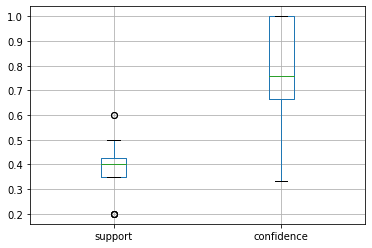

In [41]:
rules2[['support','confidence']].boxplot()

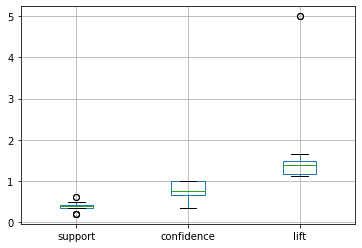

In [42]:
rules2[['support','confidence','lift']].boxplot()

 sns scatter plot 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


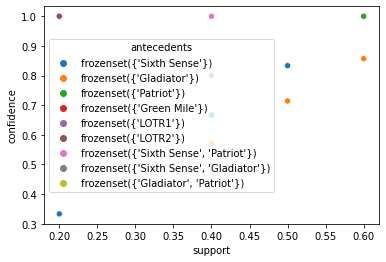

In [43]:
sns.scatterplot('support','confidence', data=rules2, hue='antecedents')
plt.show()

# bar graph 

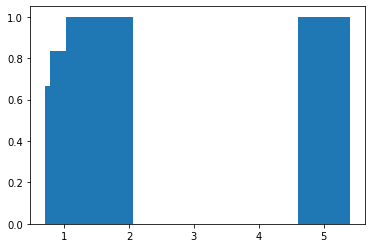

In [44]:
plt.bar(rules2['lift'], rules2['confidence'])
plt.show()

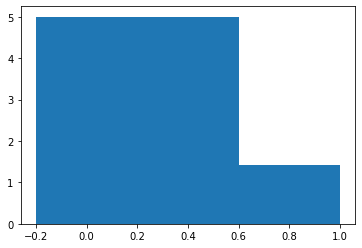

In [45]:
plt.bar(rules2['support'], rules2['lift'])
plt.show()